<a href="https://colab.research.google.com/github/SamarthK1/Loan-Approval-Prediction/blob/preprocessing/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing
---

Import dependencies

In [1]:
import numpy as np
import pandas as pd

Load the csv file

In [2]:
data = pd.read_csv('loan_approval_dataset.csv')

In [3]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
data.shape

(252000, 13)

Check for missing values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


Split into test/train

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Risk_Flag', axis=1), data['Risk_Flag'], test_size=0.2, random_state=42)

In [7]:
X_train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
200471,200472,9121364,70,18,single,rented,no,Artist,Sikar,Rajasthan,3,11
92611,92612,2636544,39,0,single,rented,no,Computer_hardware_engineer,Vellore,Tamil_Nadu,0,11
86397,86398,1010539,39,9,single,rented,no,Secretary,Hyderabad,Telangana,4,13
110500,110501,3897430,21,2,single,rented,no,Technician,Tinsukia,Assam,2,12
185133,185134,9470213,41,5,single,norent_noown,yes,Web_designer,Bidar,Karnataka,5,13


In [8]:
y_train.head()

,Risk_Flag
200471,0
92611,0
86397,0
110500,0
185133,0


Label Encoder for Categorical features

In [9]:
from sklearn.preprocessing import LabelEncoder

'''
Categorical Features:
  Married/Single
  House_Ownership
  Car_Ownership
  Profession
  CITY
  STATE
'''

le = LabelEncoder()
categories = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession','CITY', 'STATE']

for cf in categories:
    X_train[cf] = le.fit_transform(X_train[cf])
    X_test[cf] = le.transform(X_test[cf])

X_train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
200471,200472,9121364,70,18,1,2,0,4,270,20,3,11
92611,92612,2636544,39,0,1,2,0,13,311,22,0,11
86397,86398,1010539,39,9,1,2,0,42,123,23,4,13
110500,110501,3897430,21,2,1,2,0,48,295,1,2,12
185133,185134,9470213,41,5,1,0,1,50,56,11,5,13


Remove the Id Column from the features

In [10]:
X_train.drop('Id', axis=1, inplace=True)
X_test.drop('Id', axis=1, inplace=True)

X_train.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
200471,9121364,70,18,1,2,0,4,270,20,3,11
92611,2636544,39,0,1,2,0,13,311,22,0,11
86397,1010539,39,9,1,2,0,42,123,23,4,13
110500,3897430,21,2,1,2,0,48,295,1,2,12
185133,9470213,41,5,1,0,1,50,56,11,5,13


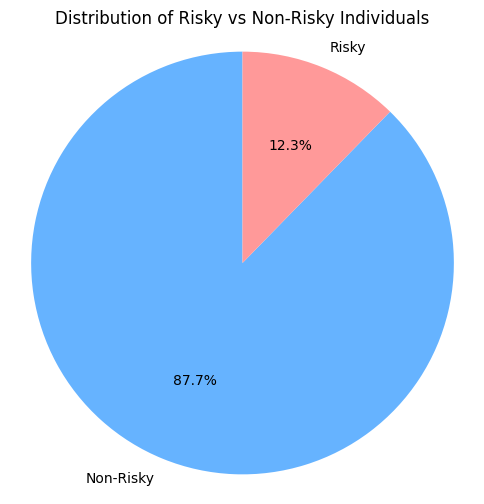

In [11]:
import matplotlib.pyplot as plt

risk_counts = data['Risk_Flag'].value_counts()

labels = risk_counts.index.map({0: 'Non-Risky', 1: 'Risky'})

plt.figure(figsize=(6,6))
plt.pie(risk_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("Distribution of Risky vs Non-Risky Individuals")
plt.axis('equal')
plt.show()

Save the split data to separate csv files.

In [12]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)